In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('diabetes.csv')

In [31]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
# Since we have only 8 features, we'll consider all of them in building multilayer perceptron network
# We first normalize the data using Min-Max Normalization

data_max = np.amax(data, axis=0)
data_min = np.amin(data, axis=0)

norm_data = (data - data_min) / (data_max - data_min)
norm_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


Text(0, 0.5, 'Pregnancies')

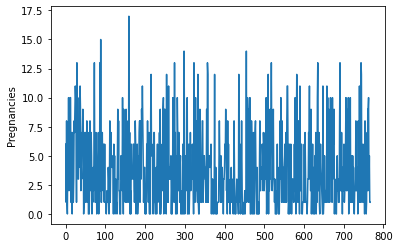

In [33]:
plt.plot(data.index, data[data.columns[0]])
plt.ylabel('Pregnancies')

Text(0, 0.5, 'Pregnancies')

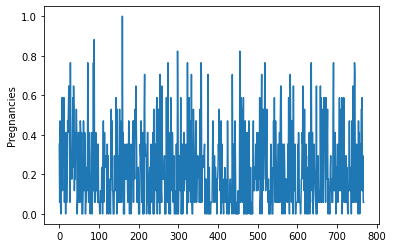

In [34]:
plt.plot(norm_data.index, norm_data[norm_data.columns[0]])
plt.ylabel('Pregnancies')

Text(0, 0.5, 'Glucose')

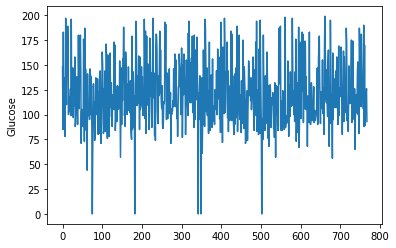

In [35]:
plt.plot(data.index, data[data.columns[1]])
plt.ylabel('Glucose')

Text(0, 0.5, 'Glucose')

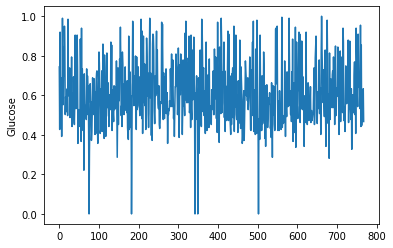

In [36]:
plt.plot(norm_data.index, norm_data[norm_data.columns[1]])
plt.ylabel('Glucose')

Text(0, 0.5, 'Blood Pressure')

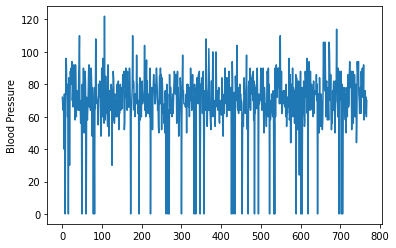

In [37]:
plt.plot(data.index, data[data.columns[2]])
plt.ylabel('Blood Pressure')

Text(0, 0.5, 'Blood Pressure')

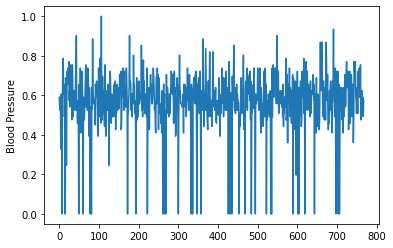

In [38]:
plt.plot(norm_data.index, norm_data[norm_data.columns[2]])
plt.ylabel('Blood Pressure')

Text(0, 0.5, 'Skin Thickness')

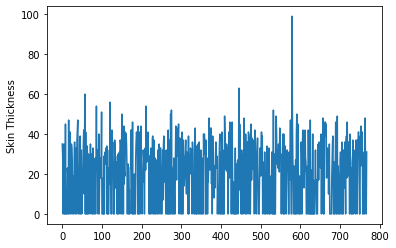

In [39]:
plt.plot(data.index, data[data.columns[3]])
plt.ylabel('Skin Thickness')

Text(0, 0.5, 'Skin Thickness')

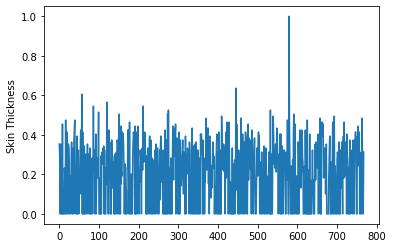

In [40]:
plt.plot(norm_data.index, norm_data[norm_data.columns[3]])
plt.ylabel('Skin Thickness')

Text(0, 0.5, 'Insulin')

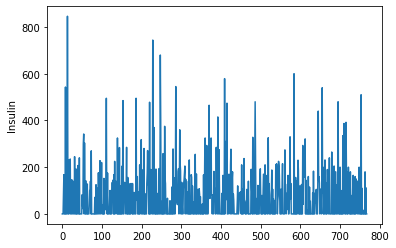

In [41]:
plt.plot(data.index, data[data.columns[4]])
plt.ylabel('Insulin')

Text(0, 0.5, 'Insulin')

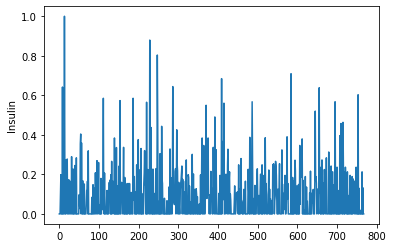

In [42]:
plt.plot(norm_data.index, norm_data[norm_data.columns[4]])
plt.ylabel('Insulin')

Text(0, 0.5, 'BMI')

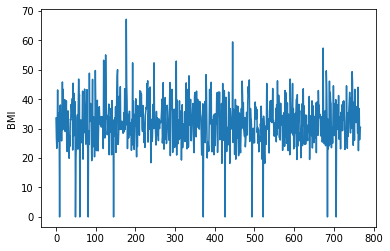

In [43]:
plt.plot(data.index, data[data.columns[5]])
plt.ylabel('BMI')

Text(0, 0.5, 'BMI')

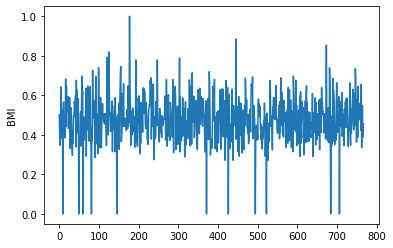

In [44]:
plt.plot(norm_data.index, norm_data[norm_data.columns[5]])
plt.ylabel('BMI')

Text(0, 0.5, 'Diabetes Pedigree Function')

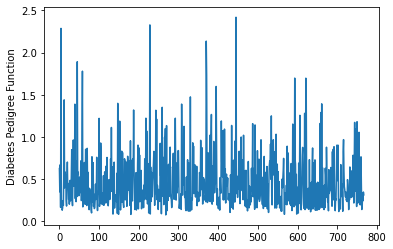

In [45]:
plt.plot(data.index, data[data.columns[6]])
plt.ylabel('Diabetes Pedigree Function')

Text(0, 0.5, 'Diabetes Pedigree Function')

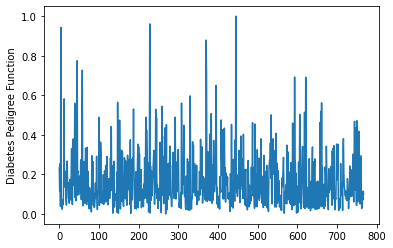

In [46]:
plt.plot(norm_data.index, norm_data[norm_data.columns[6]])
plt.ylabel('Diabetes Pedigree Function')

Text(0, 0.5, 'Age')

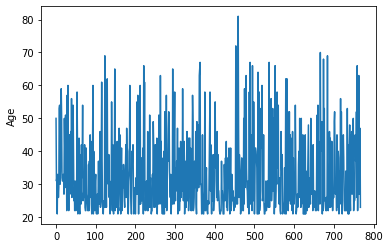

In [47]:
plt.plot(data.index, data[data.columns[7]])
plt.ylabel('Age')

Text(0, 0.5, 'Age')

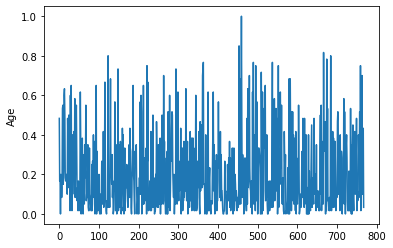

In [48]:
plt.plot(norm_data.index, norm_data[norm_data.columns[7]])
plt.ylabel('Age')

In [49]:
# Observe that there is not much difference b/w values due to linear normalization
# Next we try Z-score Normalization
data_std = np.std(data, axis=0)
data_mean = np.mean(data, axis=0)

z_norm_data = (data - data_mean) / data_std
z_norm_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


Text(0, 0.5, 'Pregnancies')

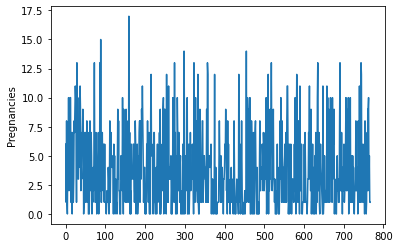

In [50]:
plt.plot(data.index, data[data.columns[0]])
plt.ylabel('Pregnancies')

Text(0, 0.5, 'Pregnancies')

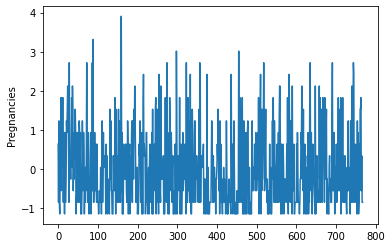

In [51]:
plt.plot(z_norm_data.index, z_norm_data[z_norm_data.columns[0]])
plt.ylabel('Pregnancies')

In [52]:
# Removing normalization from target vector
for i in range(len(z_norm_data)):
  if z_norm_data['Outcome'][i] > 0:
    z_norm_data['Outcome'][i] = 1
  else:
    z_norm_data['Outcome'][i] = 0
z_norm_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.0
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0.0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0.0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0.0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.0


In [53]:
# Shuffle the dataset to avoid overfitting
# Using train-dev-test fractions as 80-10-10

train = z_norm_data.sample(frac=0.8).reset_index(drop=True)
dev = z_norm_data.sample(frac=0.1).reset_index(drop=True)
test = z_norm_data.sample(frac=0.1).reset_index(drop=True)

In [54]:
# Split target vector from feature frame

def split_target(df):
  train_df = pd.DataFrame()
  target_df = pd.DataFrame()
  for i in df.columns:
    if i == 'Outcome':
      target_df = df[i]
    else:
      train_df = train_df.append(df[i])
  train_df = pd.DataFrame.transpose(train_df)
  return train_df, target_df

In [55]:
x_train, y_train = split_target(train)
x_dev, y_dev = split_target(dev)
x_test, y_test = split_target(test)

In [57]:
# Converting numpy arrays to tensors
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train.astype(float))

x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test.astype(float))

x_dev = tf.convert_to_tensor(x_dev)
y_dev = tf.convert_to_tensor(y_dev.astype(float))

In [92]:
# Basic Model
Basic_model = keras.Sequential(
    [
     layers.Dense(256, activation='relu'),
     layers.Dense(512, activation='relu'),
     layers.Dense(256, activation='relu'),
     layers.Dense(1, activation='sigmoid')
    ]
)

Basic_model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy'],
)

In [93]:
hist = Basic_model.fit(x_train, y_train, batch_size=16, epochs=75, verbose=2, validation_data=(x_dev, y_dev))

Epoch 1/75
39/39 - 1s - loss: 0.5407 - accuracy: 0.7329 - val_loss: 0.3655 - val_accuracy: 0.8442
Epoch 2/75
39/39 - 0s - loss: 0.4849 - accuracy: 0.7720 - val_loss: 0.3386 - val_accuracy: 0.8312
Epoch 3/75
39/39 - 0s - loss: 0.4634 - accuracy: 0.7687 - val_loss: 0.3450 - val_accuracy: 0.8442
Epoch 4/75
39/39 - 0s - loss: 0.4548 - accuracy: 0.7769 - val_loss: 0.2811 - val_accuracy: 0.8831
Epoch 5/75
39/39 - 0s - loss: 0.4460 - accuracy: 0.7866 - val_loss: 0.2880 - val_accuracy: 0.8701
Epoch 6/75
39/39 - 0s - loss: 0.4290 - accuracy: 0.8094 - val_loss: 0.2873 - val_accuracy: 0.8961
Epoch 7/75
39/39 - 0s - loss: 0.4174 - accuracy: 0.8029 - val_loss: 0.2613 - val_accuracy: 0.8961
Epoch 8/75
39/39 - 0s - loss: 0.4008 - accuracy: 0.8094 - val_loss: 0.2710 - val_accuracy: 0.9351
Epoch 9/75
39/39 - 0s - loss: 0.3883 - accuracy: 0.8322 - val_loss: 0.3007 - val_accuracy: 0.8701
Epoch 10/75
39/39 - 0s - loss: 0.3786 - accuracy: 0.8225 - val_loss: 0.2334 - val_accuracy: 0.9221
Epoch 11/75
39/39 -

In [94]:
Basic_model.evaluate(x_test, y_test, batch_size=32, verbose=2)

3/3 - 0s - loss: 0.3561 - accuracy: 0.9481


[0.35606732964515686, 0.948051929473877]

In [95]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

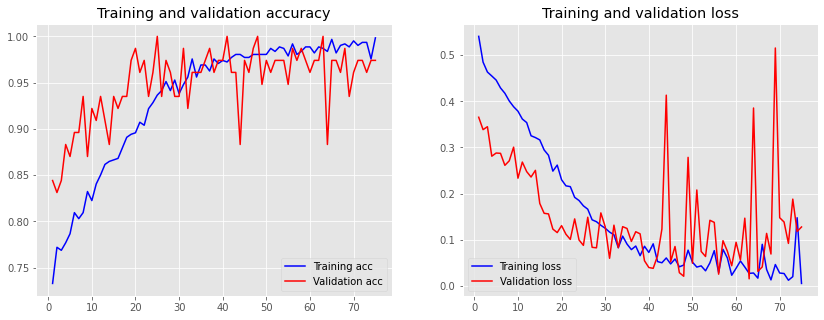

In [96]:
plot_history(hist)